In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader as data
import yfinance as yf

In [12]:
import yfinance as yf

start = "2010-01-01"
end = "2022-12-31"
ticker = "TSLA"

# Fetch historical stock data for Tesla (TSLA)
df = yf.download(ticker, start=start, end=end)

# Print the fetched data
print(df.head())


# # Fetch historical stock data for Apple (AAPL)
# ticker = "AAPL"
# data = yf.download(ticker, start="2010-01-01", end="2022-12-31")

# # Print the fetched data
# print(data)


[*********************100%***********************]  1 of 1 completed
                Open      High       Low     Close  Adj Close     Volume
Date                                                                    
2010-06-29  1.266667  1.666667  1.169333  1.592667   1.592667  281494500
2010-06-30  1.719333  2.028000  1.553333  1.588667   1.588667  257806500
2010-07-01  1.666667  1.728000  1.351333  1.464000   1.464000  123282000
2010-07-02  1.533333  1.540000  1.247333  1.280000   1.280000   77097000
2010-07-06  1.333333  1.333333  1.055333  1.074000   1.074000  103003500


In [13]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-12-23,126.370003,128.619995,121.019997,123.150002,123.150002,166989700
2022-12-27,117.500000,119.669998,108.760002,109.099998,109.099998,208643400
2022-12-28,110.349998,116.269997,108.239998,112.709999,112.709999,221070500
2022-12-29,120.389999,123.570000,117.500000,121.820000,121.820000,221923300
2022-12-30,119.949997,124.480003,119.750000,123.180000,123.180000,157777300


In [14]:
df = df.reset_index()

In [15]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500
1,2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
2,2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
3,2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
4,2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500


In [16]:
df = df.drop(['Date' , 'Adj Close'] , axis = 1)
df.head()

,Open,High,Low,Close,Volume
0,1.266667,1.666667,1.169333,1.592667,281494500
1,1.719333,2.028000,1.553333,1.588667,257806500
2,1.666667,1.728000,1.351333,1.464000,123282000
3,1.533333,1.540000,1.247333,1.280000,77097000
4,1.333333,1.333333,1.055333,1.074000,103003500


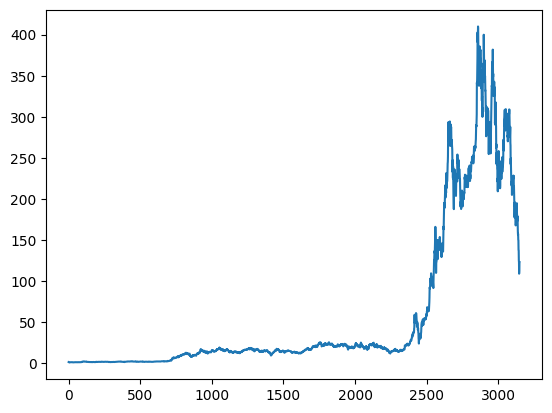

In [17]:
plt.plot(df.Close)

In [18]:
df


,Open,High,Low,Close,Volume
0,1.266667,1.666667,1.169333,1.592667,281494500
1,1.719333,2.028000,1.553333,1.588667,257806500
2,1.666667,1.728000,1.351333,1.464000,123282000
3,1.533333,1.540000,1.247333,1.280000,77097000
4,1.333333,1.333333,1.055333,1.074000,103003500
...,...,...,...,...,...
3145,126.370003,128.619995,121.019997,123.150002,166989700
3146,117.500000,119.669998,108.760002,109.099998,208643400
3147,110.349998,116.269997,108.239998,112.709999,221070500
3148,120.389999,123.570000,117.500000,121.820000,221923300


In [19]:
ma100  = df.Close.rolling(100).mean()
ma100

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
3145    234.019467
3146    232.024134
3147    230.269534
3148    228.583501
3149    226.981967
Name: Close, Length: 3150, dtype: float64

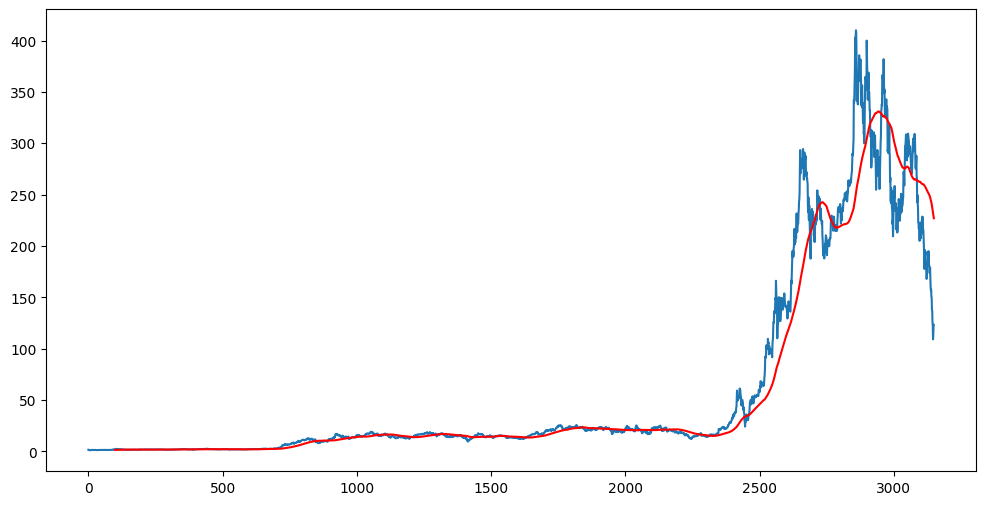

In [20]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100 , 'red')

In [23]:
ma200  = df.Close.rolling(200).mean()
ma200

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
3145    255.097317
3146    254.317234
3147    253.603501
3148    252.876117
3149    252.091634
Name: Close, Length: 3150, dtype: float64

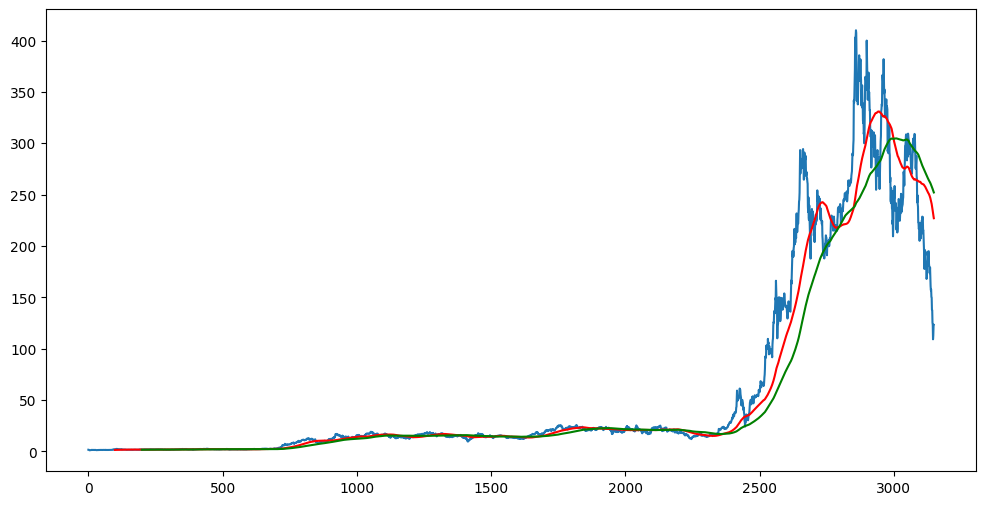

In [24]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100 , 'red')
plt.plot(ma200 , 'green')

In [25]:
df.shape

(3150, 5)

In [27]:
# training and testing set
data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70): int(len(df))])

print(data_training.shape)
print(data_testing.shape)

(2205, 1)
(945, 1)


In [28]:
data_training.head()

,Close
0,1.592667
1,1.588667
2,1.464000
3,1.280000
4,1.074000


In [29]:
data_testing.head()

,Close
2205,19.454000
2206,17.851999
2207,18.330667
2208,18.213333
2209,18.153999


In [36]:
#scaling down the array

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [38]:
data_training_array = scaler.fit_transform(data_training)
data_training_array.shape

(2205, 1)

In [42]:
x_train = []
y_train = []

for i in  range(100 ,data_training_array.shape[0]):
    x_train.append(data_training_array[i-100 : i])
    y_train.append(data_training_array[i , 0])
    
    
x_train , y_train = np.array(x_train), np.array(y_train)

In [43]:
from keras.layers import Dense , Dropout , LSTM
from keras.models import Sequential

In [45]:
model = Sequential()
model.add(LSTM(units = 50 , activation = 'relu' , return_sequences = True , input_shape = (x_train.shape[1] , 1)))

model.add(Dropout(0.2))

model.add(LSTM(units = 60 , activation = 'relu' , return_sequences = True))

model.add(Dropout(0.3))

model.add(LSTM(units = 80 , activation = 'relu' , return_sequences = True))

model.add(Dropout(0.4))

model.add(LSTM(units = 60 , activation = 'relu' ))

model.add(Dropout(0.5))

model.add(Dense(units= 1))


In [47]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 60)               

In [48]:
model.compile(optimizer = 'adam' , loss="mean_squared_error")
model.fit(x_train , y_train , epochs = 50)

Epoch 1/50
66/66 [==============================] - 13s 128ms/step - loss: 0.0621
Epoch 2/50
66/66 [==============================] - 8s 124ms/step - loss: 0.0161
Epoch 3/50
66/66 [==============================] - 8s 126ms/step - loss: 0.0142
Epoch 4/50
66/66 [==============================] - 8s 125ms/step - loss: 0.0117
Epoch 5/50
66/66 [==============================] - 8s 124ms/step - loss: 0.0122
Epoch 6/50
66/66 [==============================] - 8s 124ms/step - loss: 0.0113
Epoch 7/50
66/66 [==============================] - 8s 125ms/step - loss: 0.0111
Epoch 8/50
66/66 [==============================] - 8s 129ms/step - loss: 0.0108
Epoch 9/50
66/66 [==============================] - 8s 128ms/step - loss: 0.0105
Epoch 10/50
66/66 [==============================] - 9s 130ms/step - loss: 0.0096
Epoch 11/50
66/66 [==============================] - 8s 128ms/step - loss: 0.0094
Epoch 12/50
66/66 [==============================] - 8s 128ms/step - loss: 0.0094
Epoch 13/50
66/66 [=====

In [50]:
model.save('keras_model.h5')

In [51]:
data_testing.head()

,Close
2205,19.454000
2206,17.851999
2207,18.330667
2208,18.213333
2209,18.153999


In [52]:
past_100_Days = data_training.tail(100)

In [54]:
final_df = past_100_Days.append(data_testing  , ignore_index=True)

C:\Users\YASH\AppData\Local\Temp\ipykernel_6104\2557828298.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df = past_100_Days.append(data_testing  , ignore_index=True)


In [55]:
final_df.head()

,Close
0,22.737333
1,23.210667
2,23.426666
3,23.367332
4,22.085333


In [56]:
input_data = scaler.fit_transform(final_df)

In [58]:
input_data.shape

(1045, 1)

In [59]:
x_test = []
y_test =[]

for i in range(100 , input_data.shape[0]):
    x_test.append(input_data[i-100 : i])
    y_test.append(input_data[i , 0 ])

In [60]:
x_test ,y_test = np.array(x_test), np.array(y_test)

In [61]:
print(x_test.shape)
print(y_test.shape)

(945, 100, 1)
(945,)


In [62]:
#amking predictions 

y_pred = model.predict(x_test)

30/30 [==============================] - 2s 40ms/step


In [63]:
y_pred.shape

(945, 1)

In [64]:
y_test

array([0.01889934, 0.0148746 , 0.01607717, 0.01578239, 0.01563332,
       0.0162614 , 0.0149818 , 0.0148612 , 0.01464012, 0.01580919,
       0.01545244, 0.01579244, 0.01403214, 0.01422475, 0.01334711,
       0.01149972, 0.0094078 , 0.010468  , 0.01000238, 0.00921854,
       0.01090849, 0.01273913, 0.01279105, 0.01140425, 0.01103243,
       0.01055342, 0.0101414 , 0.00804612, 0.00893381, 0.00887351,
       0.00826721, 0.00536967, 0.00442001, 0.00437311, 0.00230464,
       0.0027669 , 0.00195291, 0.00162966, 0.00182395, 0.00154927,
       0.00103675, 0.        , 0.00245035, 0.00295114, 0.00451882,
       0.00427597, 0.00567952, 0.00638632, 0.00507321, 0.00585203,
       0.00602119, 0.00771449, 0.00766592, 0.00794898, 0.00680838,
       0.00718356, 0.00748169, 0.00683184, 0.00674976, 0.0073477 ,
       0.00745154, 0.00807292, 0.0076341 , 0.0093676 , 0.00906612,
       0.00860386, 0.00855696, 0.0100409 , 0.00998731, 0.01107263,
       0.01248288, 0.01229529, 0.01271066, 0.01248957, 0.01326

In [65]:
y_pred

array([[0.0446386 ],
       [0.04459524],
       [0.04457366],
       [0.044572  ],
       [0.04458725],
       [0.04461524],
       [0.04465097],
       [0.04469091],
       [0.04473042],
       [0.04476547],
       [0.04479221],
       [0.04480925],
       [0.0448162 ],
       [0.04481447],
       [0.04480392],
       [0.04478478],
       [0.04475719],
       [0.04471958],
       [0.04466766],
       [0.04459897],
       [0.04451221],
       [0.04440638],
       [0.04428351],
       [0.04414964],
       [0.04401278],
       [0.04387948],
       [0.04375479],
       [0.0436419 ],
       [0.0435428 ],
       [0.04345554],
       [0.04337794],
       [0.04330811],
       [0.04324454],
       [0.04318291],
       [0.04311752],
       [0.04304409],
       [0.04295713],
       [0.04285359],
       [0.0427317 ],
       [0.04259127],
       [0.04243436],
       [0.04226458],
       [0.0420863 ],
       [0.04190221],
       [0.04171801],
       [0.04154006],
       [0.04137677],
       [0.041

In [66]:
scaler.scale_

array([0.00251232])

In [67]:
scale_factor = 1/0.00251232
y_pred= y_pred *scale_factor
y_test = y_test*scale_factor

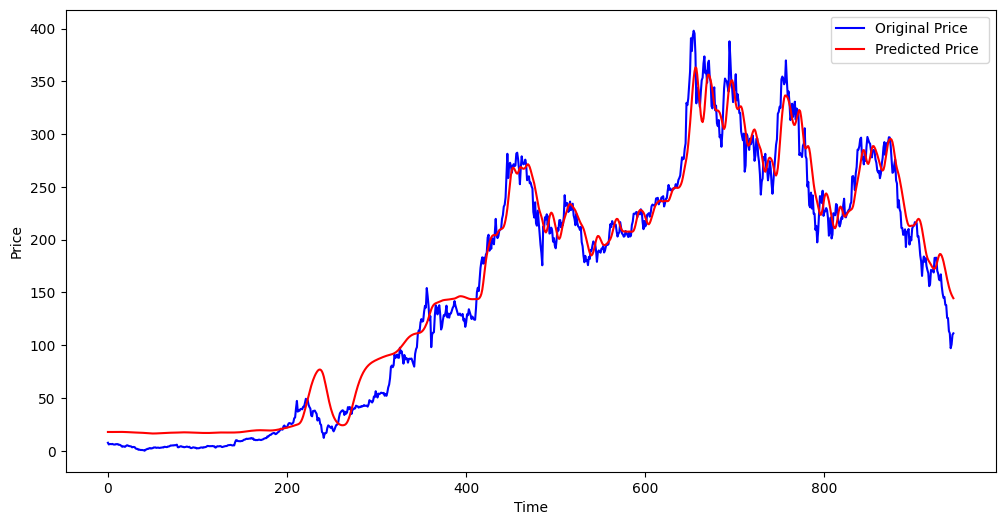

In [69]:
plt.figure(figsize=(12,6))
plt.plot(y_test , 'b' , label = 'Original Price')
plt.plot(y_pred , 'r' , label = "Predicted Price ")
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()